In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Filtered Data One

In [2]:
df1_filtered = pd.read_csv("asserts/df1_filtered.csv")

In [3]:
df1_filtered.head()


,State,County,City,Make,Model,ModelYear,EVType,ElectricRange,BasePrice
0,WA,King,Seattle,BMW,X5,2023,PHEV,30,0
1,WA,Yakima,Moxee,FORD,ESCAPE,2022,PHEV,38,0
2,WA,King,Seattle,CHEVROLET,BOLT EV,2018,BEV,238,0
3,WA,King,Newcastle,TESLA,MODEL S,2013,BEV,208,69900
4,WA,Kitsap,Bremerton,FORD,C-MAX,2015,PHEV,19,0


## Outliers in Electric Range Aanlysis

Thoroughly investigate both ends of the ElectricRange—the zeros and the high values, to draw meaningful conclusions and decide on the next steps.

Utilize visualizations and cross-variable analyses to gain deeper insights and validate the findings.

In [4]:
df1_filtered['ElectricRange'].value_counts()

0      63875
215     6463
220     4142
84      4036
238     3548
       ...  
74         4
95         3
11         1
59         1
57         1
Name: ElectricRange, Length: 102, dtype: int64

Findings: Given the value counts for the ElectricRange, it’s evident that a substantial portion of my dataset has an ElectricRange of 0, with 63,875 entries.

In [5]:
df1_filtered['ElectricRange'].describe()

count    143359.000000
mean         70.486757
std          97.120983
min           0.000000
25%           0.000000
50%          19.000000
75%         111.000000
max         337.000000
Name: ElectricRange, dtype: float64

Findings: 50% of the data points have an ElectricRange value of 19 or below, but the maximum value is 337. The standard deviation is also high, which indicates high variability in the ElectricRange.



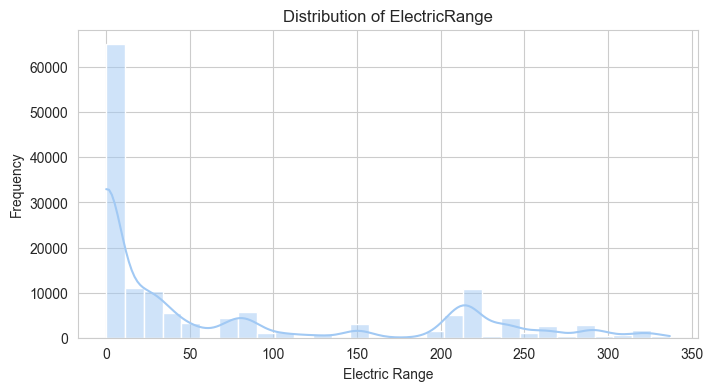

In [19]:
#Visualizing the distribution of the electric range 

plt.figure(figsize=(8,4))
sns.histplot(df1_filtered['ElectricRange'], kde=True, bins=30)
plt.title('Distribution of ElectricRange')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()


Findings: As we can see the frequency of a zero electric range prominently overshadows the other ranges, exceeding 60,000 occurrences. This significantly eclipses the frequencies of the non-zero electric ranges, which all fall below 10,000 occurrences. Such a predominant concentration of zeros creates a substantial imbalance in the distribution.


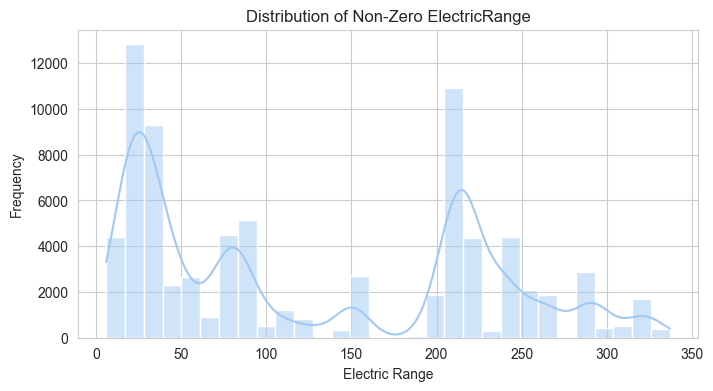

In [20]:
#exclude the zero valus and only focus on the rest of the distribution
plt.figure(figsize=(8,4))
sns.histplot(df1_filtered[df1_filtered['ElectricRange'] > 0]['ElectricRange'], kde=True, bins=30)
plt.title('Distribution of Non-Zero ElectricRange')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()


Findings: This histogram focused solely on non-zero electric ranges, the data illustrates a pronounced bifurcation in frequency distribution. A particular range, presumed to be approximately 20, is observed to have an elevated frequency exceeding 12,000 occurrences, and another cluster around the 200 mark is noted to surpass 10,000 occurrences.

Beyond these predominant ranges, there are scattered concentrations of frequencies, where approximately six bins are observed with frequencies above 2,000 but below 5,000 occurrences. These bins are discerned within specific electric range segments, including sub-20, 80 to 90, around 220, 250, and near 290. The majority of the remaining bins display a subdued presence with frequencies below 2,000 occurrences.

In [8]:
# detect outliers in "ElectricRange" column using IQR method
Q1 = df1_filtered['ElectricRange'].quantile(0.25)
Q3 = df1_filtered['ElectricRange'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df1_filtered[(df1_filtered['ElectricRange'] < lower_bound) | (df1_filtered['ElectricRange'] > upper_bound)]
print('Outliers in Electric Range:')
print(outliers['ElectricRange'])

Outliers in Electric Range:
15        293
67        322
71        293
76        289
81        291
         ... 
143237    289
143277    293
143298    291
143350    291
143352    291
Name: ElectricRange, Length: 5925, dtype: int64


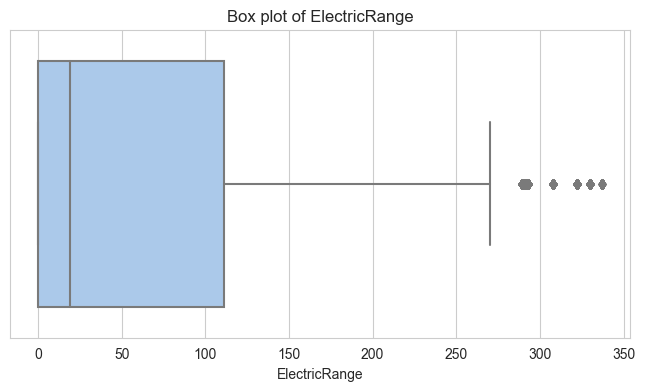

In [21]:
#visualize the outliers using a Box Plot
plt.figure(figsize=(8,4))
sns.boxplot(x=df1_filtered['ElectricRange'])
plt.title('Box plot of ElectricRange')
plt.show()

Findings: By utilizing the IQR method to identify outliers in the ‘ElectricRange’ variable, it becomes evident from the boxplot that there is a substantial number of outliers, showcasing significant variability and deviation within the dataset.

### Analyzing the Zero Values

Considering the findings above, the initial step is to scrutinize the rows with zero values in the 'ElectricRange' variable. It is imperative to ascertain whether a value of 0 represents instances of missing or unrecorded data, or if it constitutes a legitimate value indicative of vehicles possessing no electric range, potentially corresponding to certain hybrid vehicle models

In [10]:
# filter out zero value rows
zero_range = df1_filtered[df1_filtered['ElectricRange'] == 0]

# Explore the characteristics of these rows, ('EVType', 'Make', 'Model', 'ModelYear')

checking_columns = ["Make", "Model", "ModelYear", "EVType"]
for column in checking_columns:
    print(f"{column}")
    print(zero_range[column].value_counts())       

Make
TESLA            39708
FORD              3351
CHEVROLET         3053
VOLKSWAGEN        2834
KIA               2501
NISSAN            2289
RIVIAN            2208
HYUNDAI           2140
VOLVO             1121
BMW               1101
AUDI               939
MERCEDES-BENZ      608
MINI               438
SUBARU             438
POLESTAR           371
PORSCHE            315
LUCID              176
TOYOTA              96
GENESIS             88
CADILLAC            49
JAGUAR              27
LEXUS               24
Name: Make, dtype: int64
Model
MODEL Y             23901
MODEL 3             12689
ID.4                 2834
MUSTANG MACH-E       2429
LEAF                 2065
BOLT EV              1970
MODEL X              1721
EV6                  1561
IONIQ 5              1464
MODEL S              1397
R1T                  1314
BOLT EUV             1083
NIRO                  937
XC40                  794
F-150                 674
I4                    641
R1S                   611
KONA ELECTRIC   

#### Interpretation of the exploration of the zero "ElectricRange" across various columns:



EV Type Consistency:

All zero 'ElectricRange' entries are solely associated with 'Battery Electric Vehicle (BEV)' types.

Make and Model:

Most zero 'ElectricRange' entries are  associated with Tesla brand, more specifically with its ‘Model Y’ and ‘Model 3.


Temporal Consistency:

Most zero 'ElectricRange' entries are concentrated in the years 2021, 2022, and 2023.

Assumptions and Hypotheses:

The predominant association of zero 'ElectricRange' entries with the Tesla brand, particularly with its ‘Model Y’ and ‘Model 3’ models, could be reflective of Tesla's current prominence in the Electric Vehicle market. It’s plausible that Tesla’s prevalence in the dataset is indicative of its widespread adoption and popularity among consumers, possibly leading to a higher frequency of such entries.

The concentration of zeros in the years 2021, 2022, and 2023 implies a consistent trend or pattern during these years, potentially due to an alteration in manufacturing, reporting, or recording practices.

The consistency of zero 'ElectricRange' values exclusively within 'BEV' types could indicate a structured pattern or a specific characteristic inherent to BEVs in the dataset, possibly due to the way the data has been recorded or reported.


### High Range Values Analysis

The maximum value is 337, which is much higher than the 75th percentile value of 111, confirming the presence of outliers on the higher end.

Analyzing high-range values is essential to understand if these are actual representations of advanced models or anomalies within the dataset.


In [11]:
#filter out high range values
high_range = df1_filtered[df1_filtered['ElectricRange'] > upper_bound]


In [12]:
#examine the desceriptive stat of the high range values
print(high_range['ElectricRange'].describe())


count    5925.000000
mean      303.960506
std        15.549961
min       289.000000
25%       291.000000
50%       293.000000
75%       322.000000
max       337.000000
Name: ElectricRange, dtype: float64


Findings: The average electric range for these high-range values is approximately 304, which is significantly higher than the mean of the overall dataset 70. The standard deviation is relatively low at approximately 15.55, indicating that these high-range values are not widely dispersed and are relatively close to the mean value of 304.


In [13]:
# Investigate the characteristics of vehicles with high electric range values, 
#focusing on variables such as 'Make', 'Model', 'ModelYear', and 'EVType'.
for column in ["Make", "Model", "ModelYear", "EVType"]:
    print(high_range[column].value_counts())


TESLA    5925
Name: Make, dtype: int64
MODEL Y    2255
MODEL 3    2209
MODEL X    1071
MODEL S     390
Name: Model, dtype: int64
2020    5514
2019     411
Name: ModelYear, dtype: int64
BEV    5925
Name: EVType, dtype: int64


In [14]:
#visulizing only the model and make year value counts result since the make and evtype both only have one valuel
# List of unique models and years
models = high_range['Model'].unique()
years = high_range['ModelYear'].unique()

# Creating a new df to hold the counts
data = []
for model in models:
    for year in years:
        count = len(high_range[(high_range['Model'] == model) & (high_range['ModelYear'] == year)])
        data.append({'Model': model, 'ModelYear': year, 'Count': count})

count_df = pd.DataFrame(data)

# Sorting the df to ensure that the bars are grouped correctly
count_df.sort_values(by=['Model', 'ModelYear'], inplace=True)


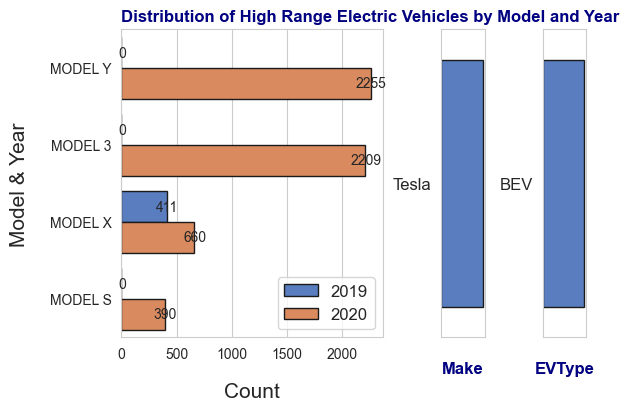

In [15]:
import matplotlib.gridspec as gridspec
#plotting

# Set style & color palette of Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Sort for ordered appearance
count_df.sort_values(by='Count', ascending=False, inplace=True)


f, ax = plt.subplots(figsize=(6, 4))

gs = gridspec.GridSpec(1, 3, width_ratios=[6, 1, 1])

ax0 = plt.subplot(gs[0])
barplot = sns.barplot(x='Count', y='Model', data=count_df, hue='ModelYear', 
                      ci=None, palette='muted', orient='h', edgecolor='0.1')

# Adding Annotations
for p in barplot.patches:
    width = p.get_width()    
    plt.text(4+p.get_width(),       
             p.get_y() + p.get_height() / 2, 
             '{:1.0f}'.format(width), 
             ha = 'center',  
             va = 'center')  

# Adding title and labels
plt.title('Distribution of High Range Electric Vehicles by Model and Year', 
          loc='left', fontsize=12, fontweight='bold', color='navy')
plt.xlabel('Count', fontsize=15, labelpad=15)
plt.ylabel('Model & Year', fontsize=15, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding a legend
plt.legend(loc='lower right', frameon=True, fontsize=12)

# Adding side visual for Make
ax1 = plt.subplot(gs[1])
sns.barplot(x=[1], y=['Tesla'], palette='muted', orient='h', edgecolor='0.1')
ax1.text(0.5, -0.1, 'Make', ha='center', va='center', fontsize=12, 
         fontweight='bold', color='navy', transform=ax1.transAxes)
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.set_xticks([]) 
ax1.set_ylabel('')  


# Adding side visual for EVType
ax2 = plt.subplot(gs[2])
sns.barplot(x=[1], y=['BEV'], palette='muted', orient='h', edgecolor='0.1')
ax2.text(0.5, -0.1, 'EVType', ha='center', va='center', fontsize=12,
         fontweight='bold', color='navy', transform=ax2.transAxes)
ax2.tick_params(axis='y', which='major', labelsize=12)
ax2.set_xticks([])  
ax2.set_ylabel('') 

plt.subplots_adjust(wspace=0.5)

plt.show()


Findings:

 The sole association of high-range values with Tesla vehicles substantiates the brand's standing as a leader in electric range capabilities, especially in the mentioned models and model years. This aligns with the understanding that Tesla models, being premium electric vehicles, are positioned as high-performance options in the electric vehicle market.
 
The uniform representation of BEV as the EVType in high-range values accentuates the inherent advantages of fully electric vehicles in achieving extended electric ranges.

This analysis further suggests a consideration of the technological advancements, market positioning, and premium status of Tesla vehicles when interpreting these high electric range values.

The prominence of the 2020 model year in the high-range segment also suggests possible enhancements or improvements made in this year, making the models from this year particularly noteworthy for those interested in high electric range vehicles.

Overall, these findings could be valuable for potential buyers, industry analysts, and electric vehicle enthusiasts looking to understand the landscape of electric vehicle ranges and the distinctive offerings from Tesla.



